In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/jobhopin/4-Kmeans-Cluster/marketing_campaign.csv")

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [ ]:
df.tail()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
2211,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2212,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7
2213,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6
2214,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3
2215,1954,PhD,Married,52869.0,1,1,40,84,3,61,2,1,21,3,3,1,4,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [ ]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


#Exploratory Data Analysis

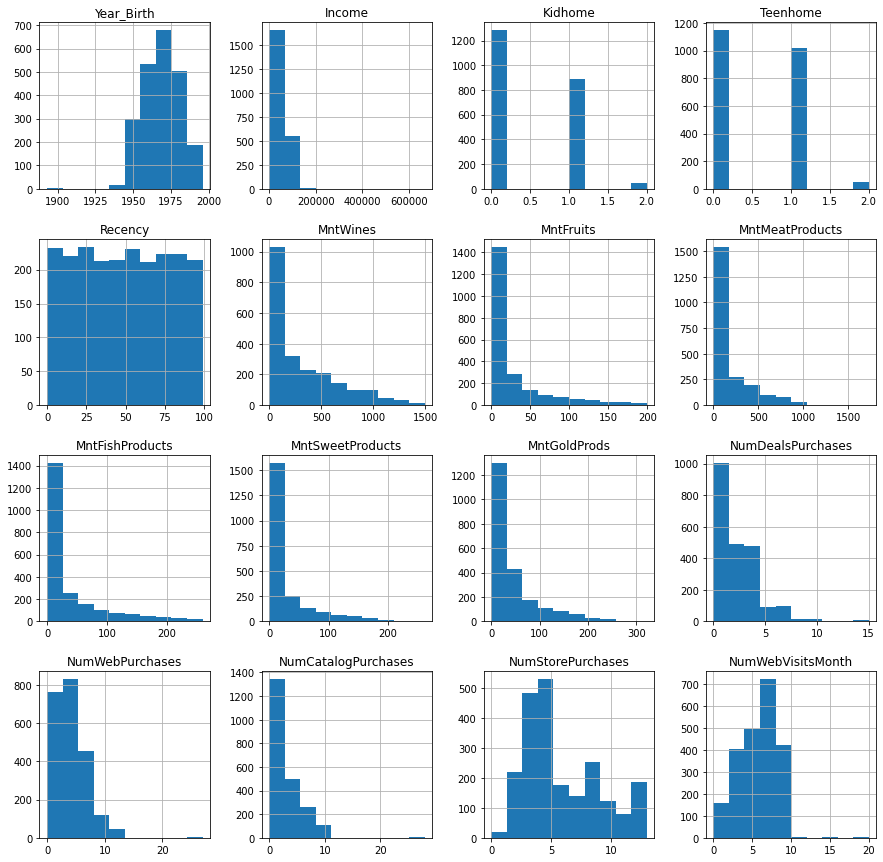

In [ ]:
df.hist(figsize=(15, 15))
plt.show()

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes=="O"] # với mỗi col trong df.columns sao cho df[col].dtypes là "O" (dạng Object) thì ta đưa col vào list

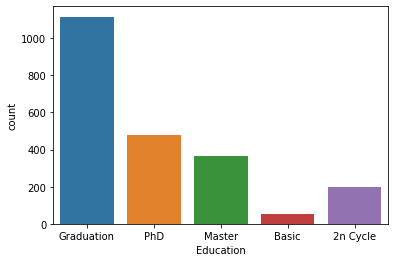

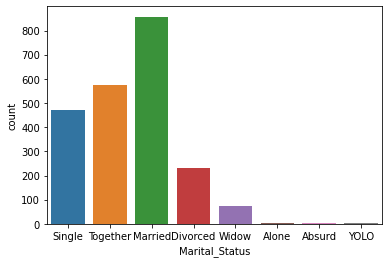

In [ ]:
for col in cat_cols: #Với mỗi phần tử col có trong cat_cols
    sns.countplot(x=col, data=df) #ta vẽ hình dạng countplot cho từng col
    plt.show() #phải dùng nếu không thì chỉ vẽ hình cuối cùng trong list 

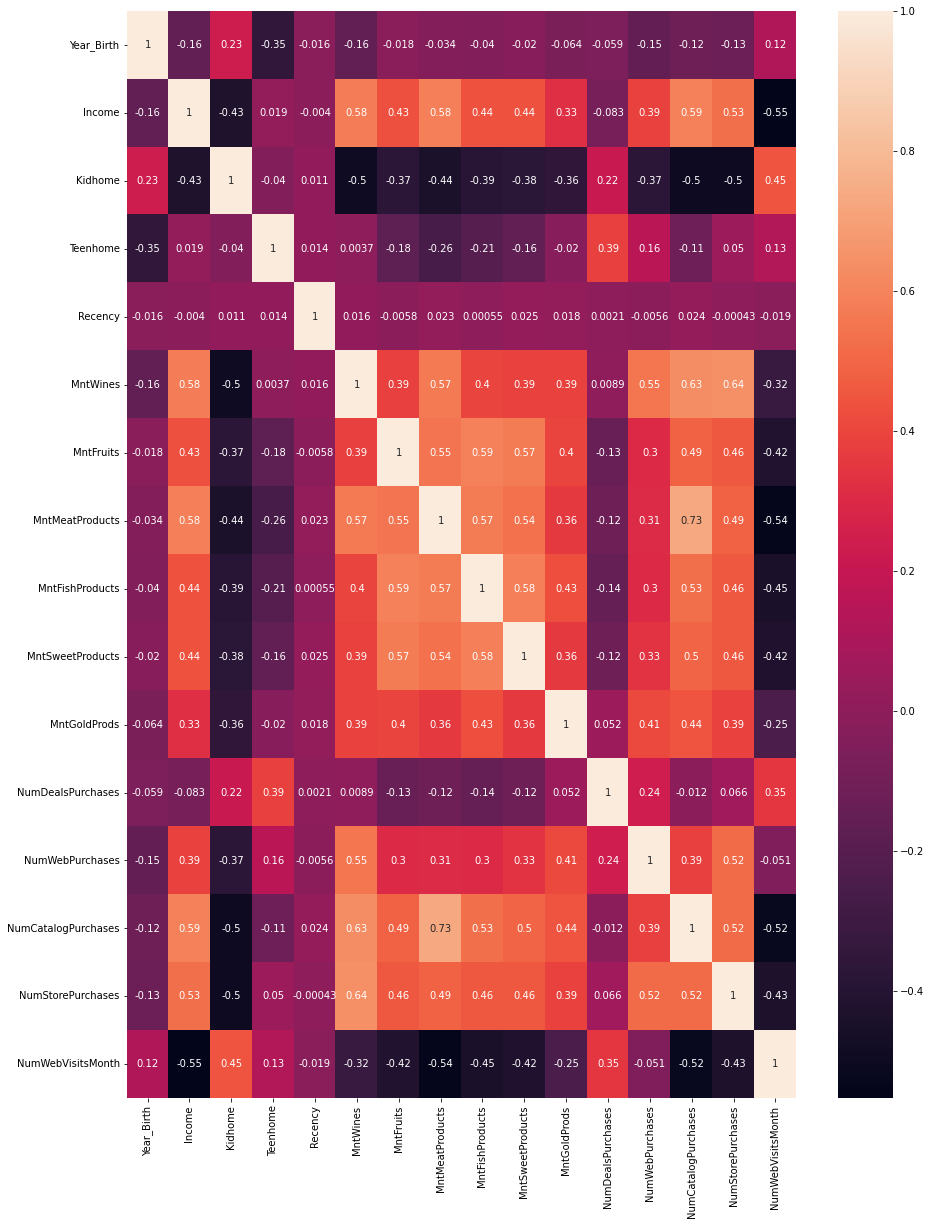

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

#Data Preprocessing

In [ ]:
data = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_cols:
    data.loc[:, col] = encoder.fit_transform(data[col])

In [ ]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1967,2,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2212,1946,4,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7
2213,1981,2,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6
2214,1956,3,5,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

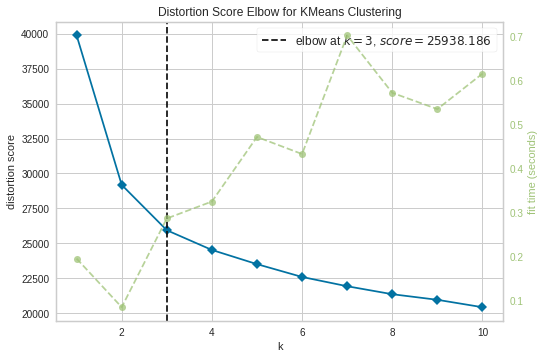

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(scaled_data)
elbow_method.show()

In [ ]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(scaled_data)

KMeans(n_clusters=3)

In [ ]:
#để xuất ra label của tập training (scaled_data) ta dùng .labels_
kmeans_model.labels_

array([2, 1, 2, ..., 2, 0, 1], dtype=int32)

In [ ]:
#để dự đoán ra label của tập testing (ta giả sử là scaled_data) ta dùng .predict
kmeans_model.predict(scaled_data)

array([2, 1, 2, ..., 2, 0, 1], dtype=int32)

In [ ]:
#Để xuất ra các centroids ta có thể dùng .cluster_centers_
kmeans_model.cluster_centers_

array([[-0.36496175,  0.24692986, -0.04770684,  0.22923299, -0.38715032,
         0.79124275, -0.00370352,  0.48295174, -0.15198597, -0.15399717,
        -0.18449441, -0.15661689,  0.30392958,  0.71750789,  0.78819028,
         0.1195474 ,  0.54791075,  0.17376251],
       [ 0.24751084, -0.12764276, -0.00225059, -0.70782547,  0.67326879,
        -0.13967563, -0.00225692, -0.78775598, -0.53913587, -0.64353296,
        -0.55228753, -0.53552426, -0.55593011, -0.14962483, -0.72758962,
        -0.73312723, -0.80830619,  0.48908007],
       [-0.03627948, -0.04381505,  0.05466409,  0.97104274, -0.74356075,
        -0.60276756,  0.00781818,  0.83808982,  1.08738895,  1.26875151,
         1.14458322,  1.08612004,  0.63073999, -0.50717124,  0.40976863,
         1.13127716,  0.80419748, -1.02464567]])

##PCA

In [ ]:
from sklearn.decomposition import PCA #Khai báo thư viện PCA
pca = PCA(n_components=len(data.columns)) #khai báo 
pca.fit(scaled_data)

PCA(n_components=18)

In [ ]:
#cho ta biết được các thành phần phủ được bao nhiêu lượng thông tin của data gốc
pca.explained_variance_ratio_*100

array([33.83469402, 11.18657464,  7.50524053,  5.81975327,  5.54115079,
        5.41758141,  4.25111091,  3.75381976,  3.56272109,  3.23908052,
        2.68164951,  2.49566076,  2.3340416 ,  2.16223859,  1.96876086,
        1.69152668,  1.35827549,  1.19611958])

##3 dimensional PCA

In [ ]:
pca = PCA(n_components=3) #dùng pca 3 thành phần
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])#tạo ra dataframe với 3 thành phàn là pca1, pca2, và pca3

In [ ]:
pca_df

,pca_1,pca_2,pca_3
0,3.821339,-0.263255,1.299834
1,-2.298688,0.211637,-1.077064
2,1.897465,-0.274196,-0.114090
3,-2.466214,-1.439655,0.322685
4,-0.270006,0.016973,0.592493
...,...,...,...
2211,2.680220,1.062410,1.817294
2212,-1.509788,3.436603,0.044935
2213,1.288089,-0.731509,0.153184
2214,2.074265,1.206442,-1.089033


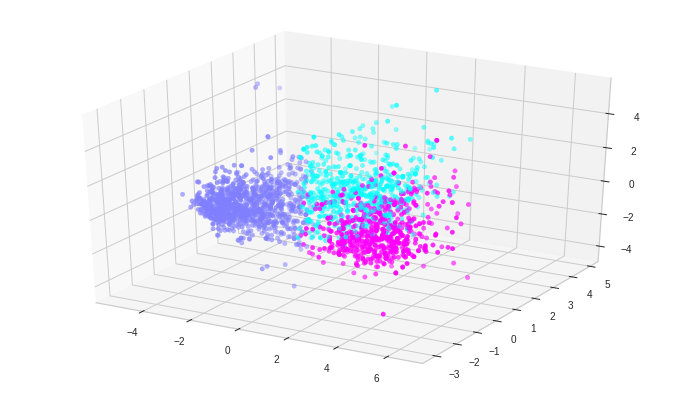

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

##2 dimensional PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_df = pd.DataFrame(pca.transform(scaled_data), columns=["pca1", "pca2"])

In [ ]:
pca_df.head()

,pca1,pca2
0,3.821342,-0.263146
1,-2.298687,0.211735
2,1.897461,-0.274487
3,-2.466214,-1.439729
4,-0.270008,0.016884


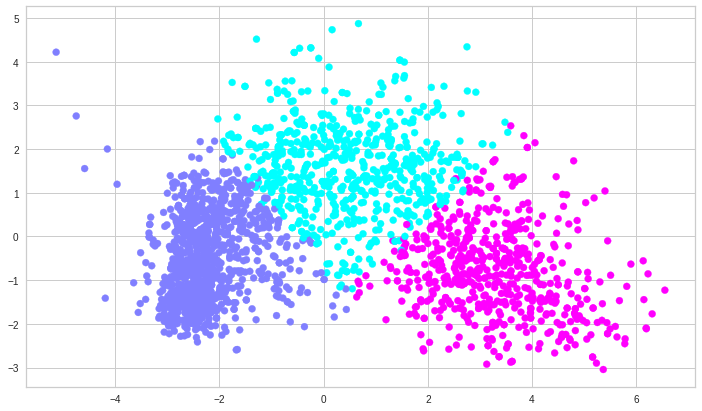

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca1, pca_df.pca2, c=kmeans_model.labels_, cmap="cool")
plt.show()

##Nếu muốn vẽ có thêm legend

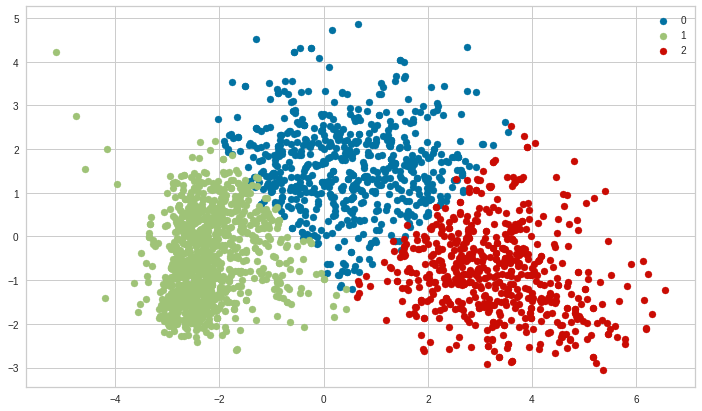

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
group = kmeans_model.labels_
for g in np.unique(group):
    index = np.where(group==g)
    ax.scatter(pca_df.iloc[index].pca1, pca_df.iloc[index].pca2, label=g, cmap="cool")
ax.legend()
plt.show()

#Save và load model

In [ ]:
#Save model
import pickle #import thư viện pickle
file_name = "model.sav" #Tạo tên cũng như đường dẫn lưu model (nếu chỉ để tên model không thì sẽ lưu tại thư mục hiện hành)
pickle.dump(kmeans_model, open(file_name, "wb")) #nhận vào tên thư viện và đường dẫn lưu trữ model

In [ ]:
#Load model
file_name = "model.sav"
model = pickle.load(open(file_name, "rb"))

#Lấy ra các dataframe theo cluster

In [ ]:
cluster = kmeans_model.labels_
cluster_0 = np.where(cluster==0) #index các data samples thuộc cluster 1
cluster_1 = np.where(cluster==1) #index các data samples thuộc cluster 2
cluster_2 = np.where(cluster==2) #index các data samples thuộc cluster 3
cluster_3 = np.where(cluster==3) #index các data samples thuộc cluster 4

In [ ]:
#Lấy ra các data samples thuộc cluster 1
data.iloc[cluster_0]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
4,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5
5,1967,3,5,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6
6,1971,2,2,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6
12,1952,3,2,59354.0,1,1,53,233,2,53,3,5,14,3,6,1,5,6
17,1949,3,3,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1962,2,4,57967.0,0,1,39,229,7,137,4,0,91,5,4,2,8,5
2207,1970,3,4,44802.0,0,0,71,853,10,143,13,10,20,2,9,4,12,8
2211,1967,2,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2212,1946,4,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7
